#Trabalho 3 - Teoria dos Grafos Aplicada

###Dupla:
**Nome:** RUY DE MORAIS E SILVA **Matricula:** 20190175695

**Nome:** JANSEN CRUZ DE SOUZA **Matricula:** 20200139170


# **Implementação e análise empírica do algoritmo de Karger** </font>

Neste trabalho, vocês deverão implementar, em qualquer linguagem de programação, o
algoritmo de Karger para a determinação de um corte mínimo em um grafo simples. O programa de
vocês fará a leitura de um grafo informado através de um arquivo de texto. O formato do arquivo é o
mesmo dos trabalhos anteriores.

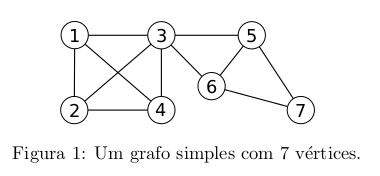

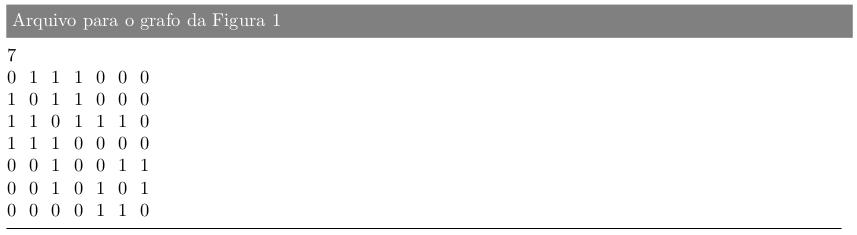





## Definições iniciais

Nesta primeira parte, deve-se apenas implementar o algoritmo. Como
referência, indico o seguinte material: https://www.dropbox.com/s/ari9bf7zlces28j/Lecture16-Stanford-Karger.pdf?dl=0

## 1) Leitura e representação do grafo

Para carregar os dados de entrada é necessário criar uma pasta chamada **entradas** e colocar os arquivos dentro.

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy

#Função que retorna as linhas que compõe os binários do grafo
def LerArquivo():
  entrada = 'graph_type2_3'
  with open(f'entradas/{entrada}','r') as arquivo:
    linhas = arquivo.readlines()[1:]

  return linhas
#função que retorna o corte mínimo para aquele grafo.
def LerSaida():
  entrada = 'graph_type2_3'
  with open(f'saida/{entrada}','r') as arquivo:
    corte_minimo = int(arquivo.readline())
  return corte_minimo

In [85]:
#Função que retorna duas tuplas, uma contendo uma lista de vértices e a outra umas lista de tuplas com todas as arestas de acordo com o grafo binário passado
def ler_grafo(grafo:str) -> tuple:
  lista_vertices = []
  lista_arestas = []
  for i in range(len(grafo)):
    lista_vertices.append(i+1)
    if ' ' in grafo[i]:
      linha = grafo[i].replace(' ','').rstrip('\n')
    else:
          linha = grafo[i].rstrip('\n')
    for j in range(len(linha)):
      if i != j:
        if linha[j] == '1':
          if [j+1,i+1] not in lista_arestas:
            lista_arestas.append([i+1,j+1])

  return lista_vertices, lista_arestas

In [86]:
#Variável recebendo as informações do grafo passado (vértices e suas respectivas arestas)
print(ler_grafo(LerArquivo()))

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], [[1, 3], [1, 5], [1, 7], [1, 11], [1, 13], [1, 15], [1, 17], [1, 19], [1, 21], [1, 23], [1, 24], [1, 25], [2, 4], [2, 6], [2, 8], [2, 10], [2, 14], [2, 16], [2, 18], [2, 20], [2, 22], [2, 24], [3, 6], [3, 7], [3, 9], [3, 11], [3, 13], [3, 15], [3, 17], [3, 19], [3, 21], [3, 23], [3, 25], [4, 6], [4, 8], [4, 10], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 18], [4, 20], [4, 22], [5, 7], [5, 9], [5, 11], [5, 13], [5, 15], [5, 17], [5, 19], [5, 21], [5, 23], [5, 25], [6, 8], [6, 10], [6, 11], [6, 12], [6, 14], [6, 16], [6, 18], [6, 20], [6, 22], [6, 24], [7, 9], [7, 11], [7, 15], [7, 17], [7, 19], [7, 21], [7, 23], [7, 25], [8, 10], [8, 12], [8, 14], [8, 16], [8, 18], [8, 20], [8, 22], [8, 24], [9, 11], [9, 13], [9, 15], [9, 17], [9, 19], [9, 21], [9, 23], [9, 25], [10, 11], [10, 12], [10, 14], [10, 16], [10, 18], [10, 22], [10, 24], [11, 13], [11, 15], [11, 17], [11, 19], [11, 23], [12, 14]

## 2) Implementação do Algoritmo de Karger



In [87]:
#Função que recebe uma tupla, que por sua vez, contem uma lista de vértices e uma lista de tuplas representando cada aresta não duplicada
def karger(grafo:tuple) -> tuple:
  #Foi necessário fazer uma cópia do grafo, pois quando a função era executada mais de uma vez o grafo ficava com seus valores alterados
  tupla_grafo = deepcopy(grafo)
  # Quantidade de vértices (vai descrescendo) e lista de vértices inicial
  num_total_vert, vertices = len(tupla_grafo[0]), tupla_grafo[0]
  arestas = tupla_grafo[1]
  n = len(LerArquivo()) #valor fixo
  dict_supernos = {}
  while(num_total_vert > 2):
    total_arestas = len(arestas)
    idx_aresta = np.random.randint(total_arestas) #índice aleatório
    nova_aresta = arestas[idx_aresta] #aresta aleatória
    if n == num_total_vert:
      #novo_vertice eh a variável que recebe o super nó
      novo_vertice = np.max(vertices) + 1
      #dicionário que guarda o histórico dos nós que se fundiram
      dict_supernos[novo_vertice] = nova_aresta
    else:
        novo_vertice += 1
        #Conjunto de condicionais que servem para tratar (sem duplicidades) o valor (listas) de cada chave do dicionário
        if nova_aresta[0] not in dict_supernos.keys():
          dict_supernos[novo_vertice] = [nova_aresta[0]]
        else:
            #Adicionei a função copy porque toda vez que no dicionario, na nova chave, adicionava um valor, alterava o valor de uma chave anterior
            dict_supernos[novo_vertice] = dict_supernos[nova_aresta[0]].copy()
        if nova_aresta[1] in dict_supernos.keys():
          vert_1 = dict_supernos[nova_aresta[1]]
          #Esse loop eh necessário pois, pode ser que a chave tenha uma lista (vértices) com mais de dois valores
          for v in vert_1:
            #Tratamento de duplicidade
            if v not in dict_supernos[novo_vertice]:
              dict_supernos[novo_vertice].append(v)
        else:
            #Tratamento de duplicidade
            if nova_aresta[1] not in dict_supernos[novo_vertice]:
              dict_supernos[novo_vertice].append(nova_aresta[1])
    #Adiciona o super nó bem como deleta os vértices que foram selecionados aleatoriamente e com isso atualizando a lista
    vertices.append(novo_vertice)
    if nova_aresta[0] in vertices:
      i1 = vertices.index(nova_aresta[0])
      del vertices[i1]
    if nova_aresta[1] in vertices:
      i2 = vertices.index(nova_aresta[1])
      del vertices[i2]
    #As arestas também serão removidas na iteração, e novas serão adicionadas
    ind_ares = arestas.index(nova_aresta)
    del arestas[ind_ares]
    #Eh necessário realizar a cópia das arestas para que as remoções não comprometam a estrutura no momento do loop
    copia_arestas = arestas.copy()
    #Loop que atualiza (remove as antigas e adicona as novas com o super nós) as arestas
    for tupla in arestas:
      if nova_aresta[0] == tupla[0]:
        if [novo_vertice,tupla[0]] not in arestas and [tupla[0],novo_vertice] not in arestas:
          copia_arestas.append([novo_vertice,tupla[1]])
        ind_ares = copia_arestas.index(tupla)
        del copia_arestas[ind_ares]
      elif nova_aresta[0] == tupla[1]:
        if [tupla[0],novo_vertice] not in arestas and [novo_vertice,tupla[0]] not in arestas:
          copia_arestas.append([tupla[0],novo_vertice])
        ind_ares = copia_arestas.index(tupla)
        del copia_arestas[ind_ares]
      elif nova_aresta[1] == tupla[0]:
        if [novo_vertice,tupla[0]] not in arestas and [tupla[0],novo_vertice] not in arestas:
          copia_arestas.append([novo_vertice,tupla[1]])
        ind_ares = copia_arestas.index(tupla)
        del copia_arestas[ind_ares]
      elif nova_aresta[1] == tupla[1]:
        if [tupla[0],novo_vertice] not in arestas and [novo_vertice,tupla[0]] not in arestas:
          copia_arestas.append([tupla[0],novo_vertice])
        ind_ares = copia_arestas.index(tupla)
        del copia_arestas[ind_ares]
    arestas = copia_arestas
    num_total_vert = len(vertices)

  return vertices, dict_supernos

In [88]:
print(karger(ler_grafo(LerArquivo())))

([10, 61], {26: [2, 6], 27: [2, 6, 24], 28: [5, 13], 29: [17, 21], 30: [5, 13, 7], 31: [9, 15], 32: [1, 23], 33: [5, 13, 7, 1, 23], 34: [20, 22], 35: [2, 6, 24, 20, 22], 36: [3, 9, 15], 37: [16, 25], 38: [16, 25, 2, 6, 24, 20, 22], 39: [5, 13, 7, 1, 23, 19], 40: [3, 9, 15, 17, 21], 41: [11, 3, 9, 15, 17, 21], 42: [5, 13, 7, 1, 23, 19, 11, 3, 9, 15, 17, 21], 43: [5, 13, 7, 1, 23, 19, 11, 3, 9, 15, 17, 21], 44: [5, 13, 7, 1, 23, 19, 11, 3, 9, 15, 17, 21, 16, 25, 2, 6, 24, 20, 22], 45: [12, 5, 13, 7, 1, 23, 19, 11, 3, 9, 15, 17, 21, 16, 25, 2, 6, 24, 20, 22], 46: [8, 12, 5, 13, 7, 1, 23, 19, 11, 3, 9, 15, 17, 21, 16, 25, 2, 6, 24, 20, 22], 47: [8, 12, 5, 13, 7, 1, 23, 19, 11, 3, 9, 15, 17, 21, 16, 25, 2, 6, 24, 20, 22], 48: [8, 12, 5, 13, 7, 1, 23, 19, 11, 3, 9, 15, 17, 21, 16, 25, 2, 6, 24, 20, 22], 49: [8, 12, 5, 13, 7, 1, 23, 19, 11, 3, 9, 15, 17, 21, 16, 25, 2, 6, 24, 20, 22], 50: [8, 12, 5, 13, 7, 1, 23, 19, 11, 3, 9, 15, 17, 21, 16, 25, 2, 6, 24, 20, 22], 51: [8, 12, 5, 13, 7, 1, 23

## 3) Implementação dos cortes das arestas

In [89]:
#Função que recebe os dois vértices do karges e ser respectivo histórico para retornar as arestas do corte
def arestas_corte(k:tuple) -> tuple:
  super_nos, dict_karger = k
  if super_nos[0] in dict_karger.keys():
    vertices1 = dict_karger[super_nos[0]]
  else:
       vertices1 = [super_nos[0]]
  if super_nos[1] in dict_karger.keys():
    vertices2 = dict_karger[super_nos[1]]
  else:
       vertices2 = [super_nos[1]]
  arestas_originais = ler_grafo(LerArquivo())[1]
  arestas_corte_minimo = []
  for v1 in vertices1:
    for v2 in vertices2:
      if v1 != v2:
        if [v1,v2] not in arestas_corte_minimo and [v2,v1] not in arestas_corte_minimo:
          if [v1,v2] in arestas_originais or [v2,v1] in arestas_originais:
            arestas_corte_minimo.append([v1,v2])

  return len(arestas_corte_minimo), arestas_corte_minimo

In [90]:
print(arestas_corte(karger(ler_grafo(LerArquivo()))))

(11, [[14, 8], [14, 10], [14, 6], [14, 4], [14, 16], [14, 12], [14, 22], [14, 20], [14, 2], [14, 24], [14, 18]])


## 4) Implementação de uma abordagem randomizada ingênua.

O algoritmo de Karger, apesar de tomar decisões randomizadas, não se trata de uma abordagem ingênua, pois, à medida em que as iterações são executadas, aumenta-se a probabilidade de se realizar contrações que retirem muitas arestas do corte final. Isso ficará evidente ao compará-lo à abordagem ingênua que simplesmente particiona aleatoriamente os vértices do grafo em dois conjuntos. Esta segunda parte consiste em implementar tal abordagem
ingênua.

In [91]:
def naive(grafo:tuple) -> tuple:
  dict_grupo = {}
  vertices = grafo[0].copy()
  n = len(vertices)
  vert_choice = [n+1 , n+2]
  vert_selecionado = np.random.choice(vertices)
  dict_grupo[vert_choice[0]] = [vert_selecionado]
  vertices.remove(vert_selecionado)
  vert_selecionado = np.random.choice(vertices)
  dict_grupo[vert_choice[1]] = [vert_selecionado]
  vertices.remove(vert_selecionado)
  while n > 0:
    vert = np.random.choice(vert_choice)
    vert_selecionado = np.random.choice(vertices)
    dict_grupo[vert].append(vert_selecionado)
    vertices.remove(vert_selecionado)
    n = len(vertices)

  return vert_choice,dict_grupo


In [92]:
print(naive(ler_grafo(LerArquivo())))

([26, 27], {26: [1, 5, 13, 15, 9, 24, 18, 10, 8, 2, 14, 16, 22], 27: [12, 23, 6, 17, 20, 19, 4, 21, 7, 25, 3, 11]})


In [93]:
print(arestas_corte(naive(ler_grafo(LerArquivo()))))

(66, [[17, 15], [17, 7], [17, 11], [17, 13], [1, 23], [1, 15], [1, 24], [1, 7], [1, 11], [1, 13], [18, 6], [18, 8], [18, 2], [18, 24], [18, 14], [18, 12], [18, 16], [18, 4], [3, 6], [3, 23], [3, 15], [3, 7], [3, 11], [3, 13], [10, 6], [10, 8], [10, 2], [10, 24], [10, 14], [10, 12], [10, 16], [10, 11], [10, 4], [9, 23], [9, 15], [9, 7], [9, 11], [9, 13], [19, 23], [19, 15], [19, 7], [19, 11], [19, 13], [21, 15], [21, 7], [21, 16], [21, 13], [22, 6], [22, 8], [22, 2], [22, 24], [22, 14], [22, 12], [22, 16], [22, 20], [22, 4], [25, 23], [25, 15], [25, 7], [25, 16], [25, 13], [5, 23], [5, 15], [5, 7], [5, 11], [5, 13]])


## 5) Análise empírica dos algoritmos.

Um grafo pode ter mais de um corte mínimo. Para cada grafo, deve-se construir um gráfico com duas curvas, uma para cada algoritmo implementado. É importante frisar que uma execução de um dos algoritmos possui N*iter* iterações, e que será retornado o menor corte encontrado nessas iterações. Nos gráficos em questão, o eixo das abscissas conterá o número de iterações N*iter*, enquanto que o eixo das ordenadas apresentará a probabilidade *p* do respectivo algoritmo encontrar o corte mínimo. Essa probabilidade será estimada executando-se o algoritmo N*exec* vezes. Sugere-se Nexec = 10000. A faixa de valores considerados para o N*iter* deve ser calibrada pelo discente. A dica é parar de aumentar o valor assim que a probabilidade
estiver muito próxima de 100%.

In [94]:
#Função que obtem o melhor corte do método Karger
def iter_karger(grafo,num_iter):

  melhor_corte = arestas_corte(karger(grafo))[0]

  for i in range(num_iter):
    novo_corte = arestas_corte(karger(grafo))[0]
    if novo_corte < melhor_corte:
      melhor_corte = novo_corte

  return melhor_corte

In [95]:
iter_karger(ler_grafo(LerArquivo()),200)

9

In [96]:
#Função que obtem o melhor corte do método Naive
def iter_naive(tuple,num_iter):

  melhor_corte = arestas_corte(naive(tuple))[0]

  for i in range(num_iter):
    novo_corte = arestas_corte(naive(tuple))[0]
    if novo_corte < melhor_corte:
      melhor_corte = novo_corte

  return melhor_corte

In [97]:
iter_naive(ler_grafo(LerArquivo()),2000)

42

In [98]:
def analise_empirica(N_exec,N_iter,grafo,algo):
  #lista para armazenar por cada iteração, encontrar o menor corte...
  candidatos = []
  #diferencia os algoritmos
  if algo == 'karger':
    for i in tqdm(range(10,N_iter+10,10)): #incrementa de 10 em 10
      aux = []
      for j in range(N_exec):
        x = iter_karger(grafo,i)
        aux.append(x)
      candidatos.append(aux)
  print()
  if algo == 'naive':
    for i in tqdm(range(10,N_iter+10,10)): #incrementa de 10 em 10
      aux = []
      for j in range(N_exec):
        x = iter_naive(grafo,i)
        aux.append(x)
      candidatos.append(aux)

  #for i in range(len(candidatos)):
    #print(i+1)
    #print(candidatos[i])

  #lendo a saida do menor corte
  min_cut = LerSaida()
  #print("O menor corte para este grafo é: ",min_cut)

  encontrados = []
  for i in range(len(candidatos)):
    cont = 0
    for item in candidatos[i]:
      if item == min_cut:
        cont += 1
    encontrados.append(cont/N_exec) #Para cada execução ele faz o cálculo de quantas vezes foram encontradas
  print(encontrados)
  #retorna duas listas para fazer o plot dos gráficos
  return range(10,N_iter+10,10),encontrados

In [99]:
#Se o N_exec for muito grande o programa demorará muito para rodar...
N_exec = 10
N_iter = 200

In [100]:
grafo = ler_grafo(LerArquivo())
x_karger,y_karger = analise_empirica(N_exec,N_iter,grafo,'karger')

100%|██████████| 20/20 [06:35<00:00, 19.78s/it]


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [101]:
grafo = ler_grafo(LerArquivo())
x_naive,y_naive = analise_empirica(N_exec,N_iter,grafo,'naive')

100%|██████████| 20/20 [00:52<00:00,  2.64s/it]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


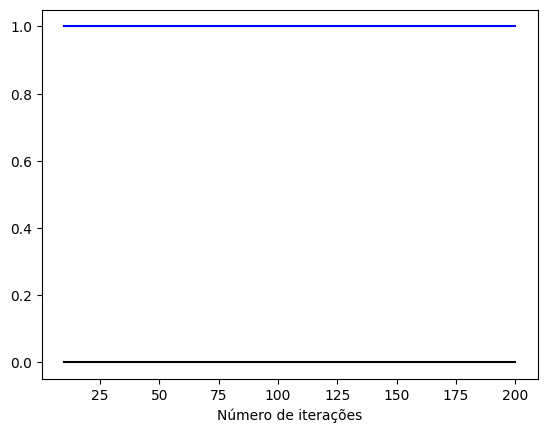

In [102]:
plt.plot(x_karger,y_karger, label = 'Karger',c='b')
plt.plot(x_naive,y_naive, label = 'Naive',c='k')
plt.xlabel('Número de iterações')
plt.show()

# Comentários acerta das execuções

- Apesar do Karger ser um algoritmo aleatório, ele possui uma lógica de contração de vertices que permite que o menor corte seja encontrado mais rapidamente em relação ao Naive, pois neste, a escolha dos vertices em que ocorrerá a contração é de forma totalmente ingênua, dessa forma, torna-se mais difícil encontrar o menor corte.

- O custo computacional do algoritmo de Karger, levando em consideração o número de execuções e o número de iterações foi um fator limitante para testes com valores maiores de N_exec devido a demora que foi encontrada para testes quando N_exec = 100, o programa costuma demorar mais de 1:30h. Por este motivo, decidiu-se permanecer com N_exec mais viáveis para os testes.